# TSA Forecasting and ML sample code

## TSA

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('C:/Udemy/DJI.txt',sep='	', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [ ]:
# indexing
furniture = furniture.set_index('Order Date')
furniture.index

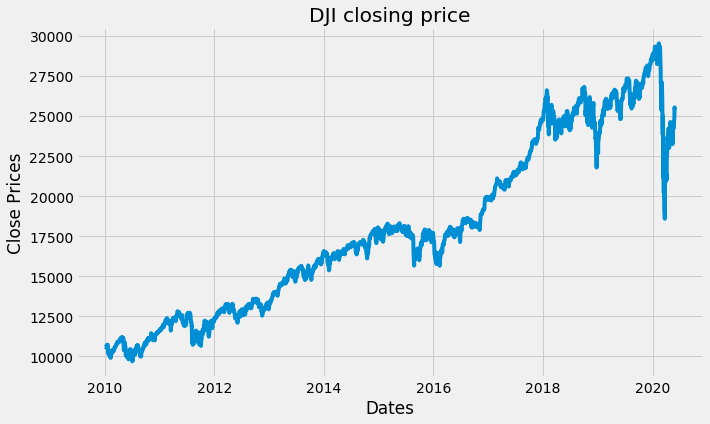

In [3]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('DJI closing price')
plt.show()

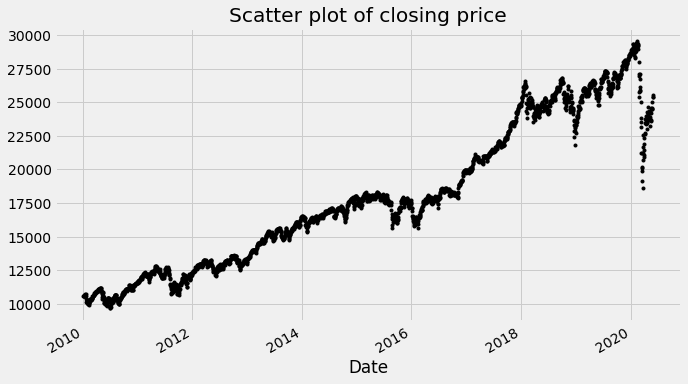

In [7]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [8]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl
TS = df_close
res_tup = _get_best_model(TS)

aic:    inf | order: None


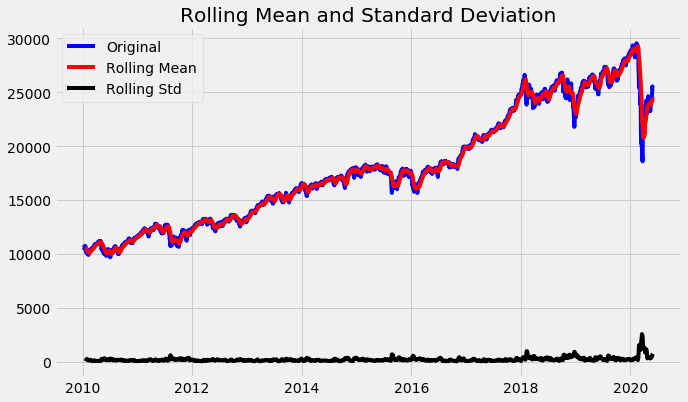

Results of dickey fuller test
Test Statistics                  -0.921213
p-value                           0.780906
No. of lags used                 27.000000
Number of observations used    2591.000000
critical value (1%)              -3.432876
critical value (5%)              -2.862656
critical value (10%)             -2.567364
dtype: float64


In [9]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

<Figure size 720x432 with 0 Axes>

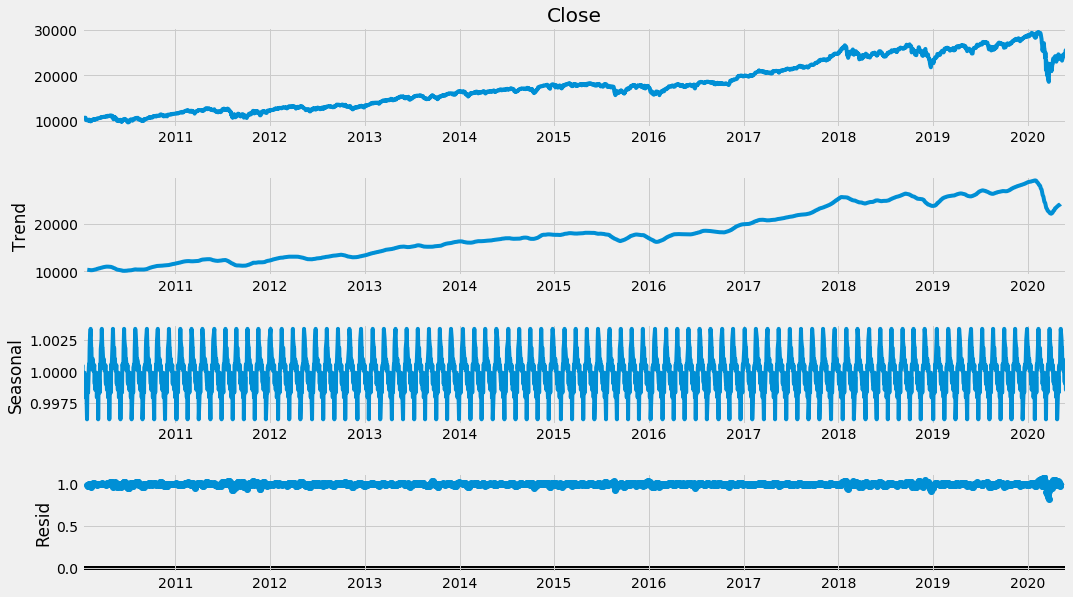

In [10]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


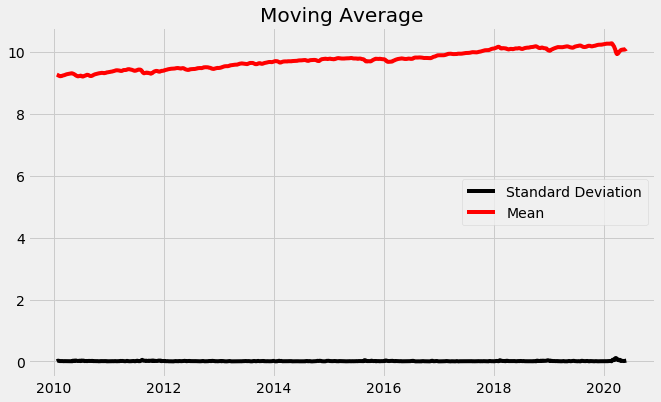

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

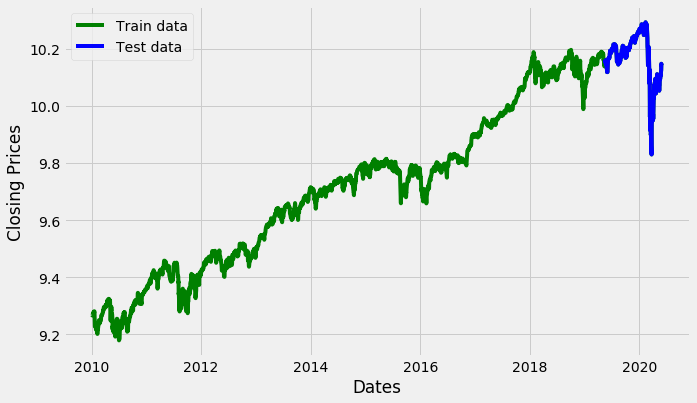

In [12]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [13]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=601.672, BIC=613.200, Time=0.398 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=-15504.579, BIC=-15487.288, Time=1.037 seconds
Near non-invertible roots for order (1, 0, 0)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=-2548.270, BIC=-2530.978, Time=0.827 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=17382.702, BIC=17388.466, Time=0.053 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=-15506.182, BIC=-15483.126, Time=0.434 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=-15504.853, BIC=-15476.033, Time=0.926 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=-15504.446, BIC=-15475.626, Time=1.323 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=-5206.475, BIC=-5183.420, Time=1.474 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True

In [14]:
print(model_autoARIMA.aic())

-15506.293346228085


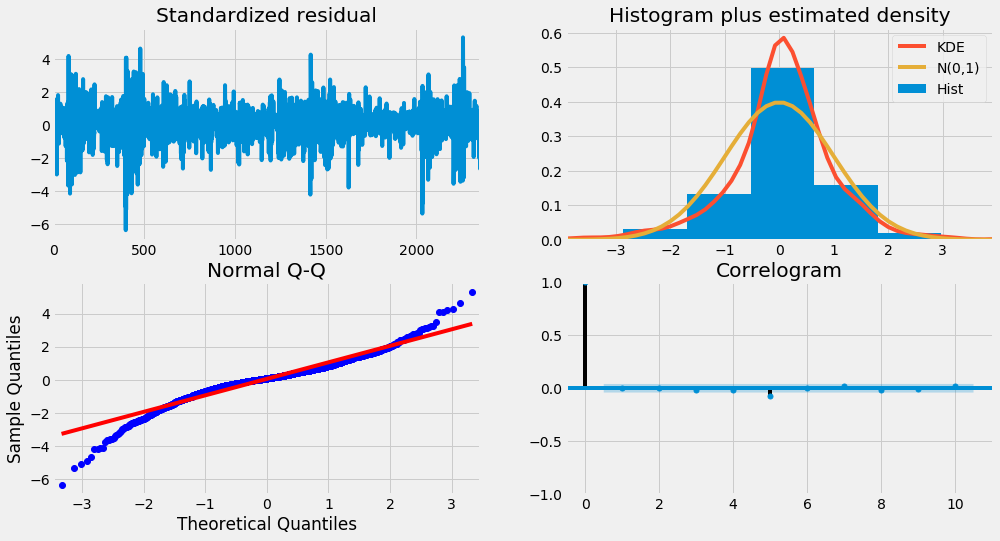

In [15]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance. 
# Top Right: The density plot suggest normal distribution with mean zero. 
# Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.
# Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

In [16]:
model = ARIMA(train_data, order=(3, 1, 2))  
#model= model_autoARIMA.fit(train_data)
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\scy_a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\scy_a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\scy_a\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2353
Model:                 ARIMA(3, 1, 2)   Log Likelihood                7766.851
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 09 Jul 2020   AIC                         -15519.703
Time:                        15:10:56   BIC                         -15479.359
Sample:                             1   HQIC                        -15505.011
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004    1.9e-05     20.681      0.000       0.000       0.000
ar.L1.D.Close     0.2621      0.269      0.974      0.330      -0.265       0.789
ar.L2.D.Close     0.7105      0.251     

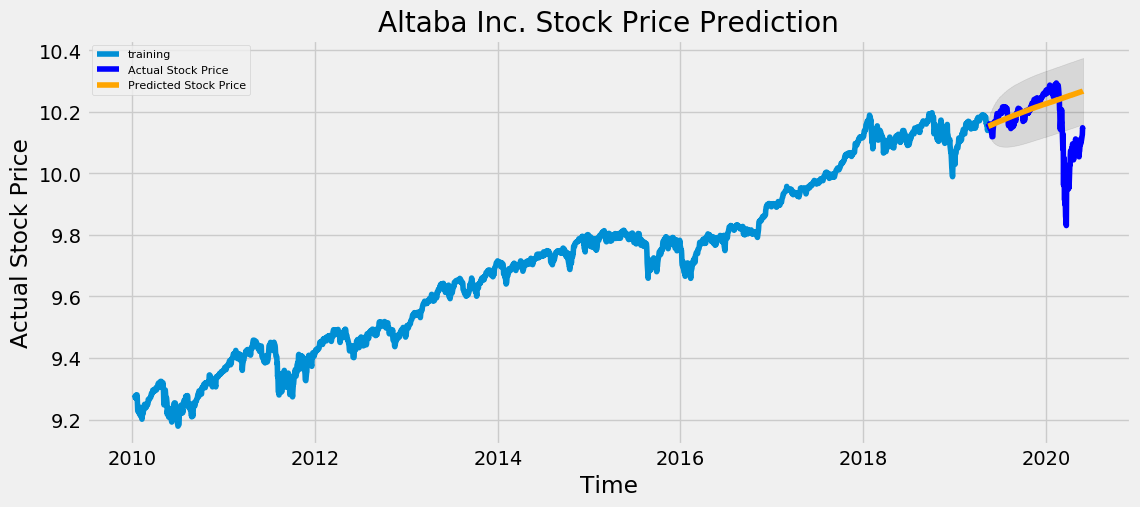

In [17]:
# Forecast
fc, se, conf = fitted.forecast(262, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [18]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.011457645401503474
MAE: 0.06533229484658232
RMSE: 0.1070403914487586
MAPE: 0.006482076675209824


In [ ]:
# Alternative Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [ ]:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
# SARIMA Forecasting

# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show

In [ ]:
# SARIMA with Exog

# Import Data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.


import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

## Machine Learning

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
df = pd.read_excel("data_Pathrise.xlsx")

In [ ]:
df.dropna(inplace = True)
df.describe()plt.figure(figsize=(30,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "highest_level_of_education",hue = "pathrise_status")
plt.legend(loc = 1)
plt.show()

In [ ]:
label=df.placed.copy()
label

In [21]:
# clean data & set dummy
features_placed_st=df.drop(columns=["id","pathrise_status","cohort_tag","program_duration_days","placed","number_of_interviews", "number_of_applications"])
features_placed_st
features_placed=pd.get_dummies(features_placed_st)
features_placed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 59 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   primary_track_Data                                                2544 non-null   uint8
 1   primary_track_Design                                              2544 non-null   uint8
 2   primary_track_Marketing                                           2544 non-null   uint8
 3   primary_track_PSO                                                 2544 non-null   uint8
 4   primary_track_SWE                                                 2544 non-null   uint8
 5   primary_track_Web                                                 2544 non-null   uint8
 6   employment_status _Contractor                                     2544 non-null   uint8
 7   employment_status _Employed Full-Time              

In [22]:
# split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features_days,days,test_size=0.2)

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.linear_model as lm

logreg = lm.LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# RF Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, rf_probs)

from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, rf_probs)

# Extract feature importances
feature_imp = pd.Series(data = rf.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)
feature_imp

feature_imp.sort_values().plot.barh(figsize = (12,20))
plt.show()

In [ ]:
# SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# RF Regression
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state = 12, n_estimators = 50,
                                   max_features= "sqrt", max_depth= 25, min_samples_split=2)
forest_reg.fit(X_train, y_train)

forest_reg.score(X_train, y_train)

from sklearn.metrics import mean_squared_error

pred = forest_reg.predict(X_train)
pred

forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

forest_reg.score(X_test, y_test)

pred = forest_reg.predict(X_test)
pred

forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

comp = pd.DataFrame(data = {"True_V": y_test, "Pred":pred})
comp

ae = comp.True_V.sub(comp.Pred).abs()
ae

mae = ae.mean()

# Extract feature importances
maefeature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)
feature_imp

In [ ]:
# Linear Regrassion
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

pred_r=reg.predict(X_test)

reg_mse = mean_squared_error(y_test, pred_r)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

# print coefficients
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = sm.OLS(y_train, X_train).fit()
print(results.summary())